In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [32]:
import pandas as pd
import numpy as np

## 넷플릭스 주가 예측을 위한 데이터셋 (2010~2020년)
filename = '/content/drive/MyDrive/python/NFLX.csv'
df = pd.read_csv(filename)

***데이터 선정 이유 (넷플릭스 주가)***
- 평소 자주 접하는 데이터를 사용하고 싶었다.(넷플릭스)
- csv 데이터셋을 찾던 중 주식 데이터셋이 많이 보여 결정했다.

***데이터셋의 유형?***
- 회귀분석(regression) 유형의 문제로 접근했다.

In [33]:
## 시작일을 기준으로(1일) 1일씩 증가하는 컬럼 생성
df['time'] = df.sort_index(ascending=True).index+1

In [34]:
# 데이터셋 확인
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,time
0,2010-01-04,7.931428,7.961429,7.565714,7.640000,7.640000,17239600,1
1,2010-01-05,7.652857,7.657143,7.258572,7.358572,7.358572,23753100,2
2,2010-01-06,7.361429,7.672857,7.197143,7.617143,7.617143,23290400,3
3,2010-01-07,7.731429,7.757143,7.462857,7.485714,7.485714,9955400,4
4,2010-01-08,7.498571,7.742857,7.465714,7.614286,7.614286,8180900,5


In [36]:
# row, column 수
df.shape

(2664, 8)

In [35]:
# 데이터셋의 데이터 타입 확인
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
time           int64
dtype: object

In [37]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
time         0
dtype: int64

***Target 특성?***
- 종가(Close)를 Target 특성으로 선택했다.

In [38]:
# 타겟 특성(Close)의 통계 요약 정보
df['Close'].describe()

count    2664.000000
mean      131.808691
std       131.222477
min         7.018571
25%        27.770356
50%        79.622142
75%       196.252499
max       548.729980
Name: Close, dtype: float64

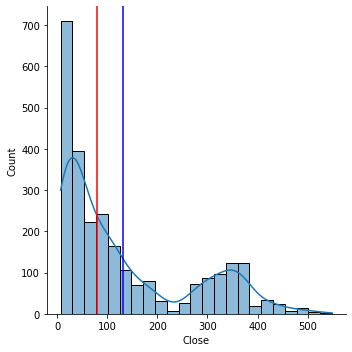

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

## Close의 확률밀도함수
sns.displot(df['Close'], kde=True)

## 평균과, 중간값으로 수직선을 그린다
plt.axvline(df['Close'].mean(), color='blue')
plt.axvline(df['Close'].median(), color='red');

***기준모델(Baseline Model)***
- 평균값을 기준으로 평균기준모델을 선정(타겟의 평균값)

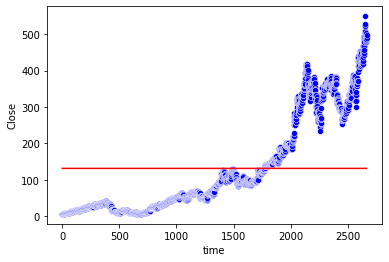

In [40]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

x = df['time']
y = df['Close']

## predict: 타겟의 평균 값을 예측값으로 설정
predict = df['Close'].mean()

## 평균값으로 예측할 때 샘플 별 평균값과의 차이(error)를 저장
errors = predict - df['Close']

# Mean Absolute Error(MAE, 평균절대오차), 예측 error의 절대값 평균
mean_absolute_error = errors.abs().mean()

sns.lineplot(x=x, y=predict, color='red')
sns.scatterplot(x=x, y=y, color='blue');

In [41]:
print(f'예측한 주가가 ${predict:,.0f}이며 절대평균에러가 ${mean_absolute_error:,.0f}임을 확인할 수 있습니다.')

예측한 주가가 $132이며 절대평균에러가 $110임을 확인할 수 있습니다.


In [42]:
# 앞의 2300개의 데이터는 train(훈련) 데이터, 뒤의 300개는 test 데이터
train =df.loc[df.time <= 2300][["Close", "time"]]
print('train data 개수: ', len(train))
test =df.loc[df.time > 2300][["Close", "time"]]
print('test data 개수: ', len(test))

train data 개수:  2300
test data 개수:  364


In [43]:
feature = ['time']
target = ['Close']
X_train = train[feature]
X_test = test[feature]
y_train = train[target]
y_test = test[target]

## 모델을 학습(fit)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [44]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('MSE : {0:.3f}, RMSE : {1:.3F}'.format(mse, rmse))
print('\nr2 Variance score  {0:.3F}'.format(r2_score(y_test, y_pred)))

MSE : 11875.810, RMSE : 108.976

r2 Variance score  -2.326


In [45]:
import statsmodels.api as sm
import os

time_tr = sm.add_constant(X_train)
mod = sm.OLS(y_train, time_tr)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     6003.
Date:                Tue, 22 Mar 2022   Prob (F-statistic):               0.00
Time:                        14:31:35   Log-Likelihood:                -12361.
No. Observations:                2300   AIC:                         2.473e+04
Df Residuals:                    2298   BIC:                         2.474e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -50.4818      2.179    -23.170      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


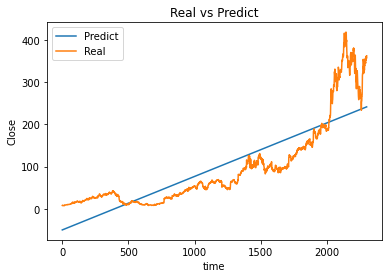

In [46]:
## 실제 주가와 예측 값의 추세

train_result=res.predict(time_tr)
plt.plot(X_train, train_result, label = "Predict")
plt.plot(X_train, y_train, label = "Real")
plt.xlabel("time")
plt.ylabel("Close")
plt.legend()
plt.title("Real vs Predict")
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


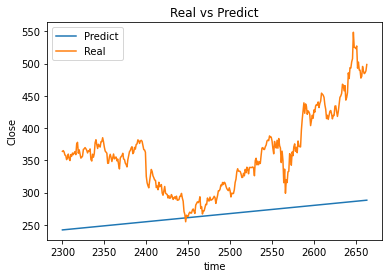

In [47]:
Close_test = y_test
time_test = X_test
time_test = sm.add_constant(time_test)

test_result=res.predict(time_test)
plt.plot(test_result, label = "Predict")
plt.plot(Close_test, label = "Real")
plt.xlabel("time")
plt.ylabel("Close")
plt.legend()
plt.title("Real vs Predict")
plt.show()

***베이스라인모델과의 비교?***
- 평균값을 이용한 베이스라인모델 보다 주가예측의 추세가 더 잘나타났다.
- 시계열 데이터 때문에 교차검증이 에러가 뜨는 것 같은데 해결이 안되서 교차검증을 못했다.